Stochastic Volatilty Models

#### Home work 1

---

The file must be sent to **stoch-vol-24-fall@yandex.ru** with topic "stoch-vol HW1".

WARNING: topic is important! Inbox will be filtered automatcally based on exact match.

Please zip all files into one folder and rename it as "SurnameName_HW1" before sending.

Deadline: 7th of October, 23:59.

If you have any questions feel free to ask in Telegram @v_antipov or @igortao.

Full name: ***Anastasia Makhova***

Faculty: ***of Mechanics and Mathematics***

---

### Problem 1 (30 points)

**1**. 💅 <span style="color:blue">(10 points)</span>  Calculate and plot **put** option prices in Black-Scholes model as functions of the underlying asset price for different **exercise times** and different **volatilities**. Use parameters

$$K = 1, \quad r = 0, \quad S \in [0.5, 1.5],$$

and $T \in \{0,\ \frac{1}{4},\ \frac{1}{2},\ \frac{3}{4},\ 1\}$ (time is measured in years) and $\sigma \in \{0.1, \ 0.2, \ 0.3\}$.

*Note: the answer should contain three plots (for each volatility $\sigma$), each of which shows option prices for different excercise times $T$.*

In [ ]:
from typing import Union, Optional, Callable
from dataclasses import dataclass
import numpy as np
import numpy.typing as npt
from scipy import stats
from scipy import optimize
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy

from ipywidgets import interact
from ipywidgets import widgets
from tqdm.auto import tqdm

In [ ]:
FloatArray = npt.NDArray[np.float_]
Floats = Union[float, FloatArray]

In [ ]:
@dataclass
class MarketState:
    stock_price: Floats
    interest_rate: Floats
    time: Floats = 0

@dataclass
class StockOption:
    strike_price: Floats
    expiration_time: Floats  # in years
    is_call: Union[bool, npt.NDArray[np.bool_]]

    def payoff(self, stock_price: Floats) -> Floats:
        call_payoff = np.maximum(0, stock_price - self.strike_price)
        put_payoff = np.maximum(0, self.strike_price - stock_price)
        return np.where(self.is_call, call_payoff, put_payoff)

class CallStockOption(StockOption):
    def __init__(self, strike_price, expiration_time):
        super().__init__(strike_price, expiration_time, True)

class PutStockOption(StockOption):
    def __init__(self, strike_price, expiration_time):
        super().__init__(strike_price, expiration_time, False)

@dataclass
class BSParams:
    volatility: Floats

In [ ]:
def dt(option: StockOption, ms: MarketState):
    return np.maximum(option.expiration_time - ms.time, np.finfo(np.float64).eps)

def d1(option: StockOption, ms: MarketState, params: BSParams):
    return 1 / (params.volatility * np.sqrt(dt(option, ms)))\
                * (np.log(ms.stock_price / option.strike_price)
                   + (ms.interest_rate + params.volatility ** 2 / 2) * dt(option, ms))


def d2(option: StockOption, ms: MarketState, params: BSParams):
    return d1(option, ms, params) - params.volatility * np.sqrt(dt(option, ms))

In [ ]:
def price(option: StockOption, ms: MarketState, params: BSParams):
    discount_factor = np.exp(-ms.interest_rate * (dt(option, ms)))

    call_price = stats.norm.cdf(d1(option, ms, params)) * ms.stock_price\
            - stats.norm.cdf(d2(option, ms, params)) * option.strike_price * discount_factor
    put_price = stats.norm.cdf(-d2(option, ms, params)) * option.strike_price * discount_factor\
        - stats.norm.cdf(-d1(option, ms, params)) * ms.stock_price

    return np.where(option.is_call, call_price, put_price)

In [ ]:
strike = 1
times = np.linspace(0, 1, 5)
sigma = np.array([0.1, 0.2, 0.3])
puts = PutStockOption(strike_price=strike,
                      expiration_time=times[:, None])

S = np.linspace(0.5, 1.5, 101)

ms = MarketState(stock_price=S, interest_rate=0)


Text(0.5, 0.01, 'S')

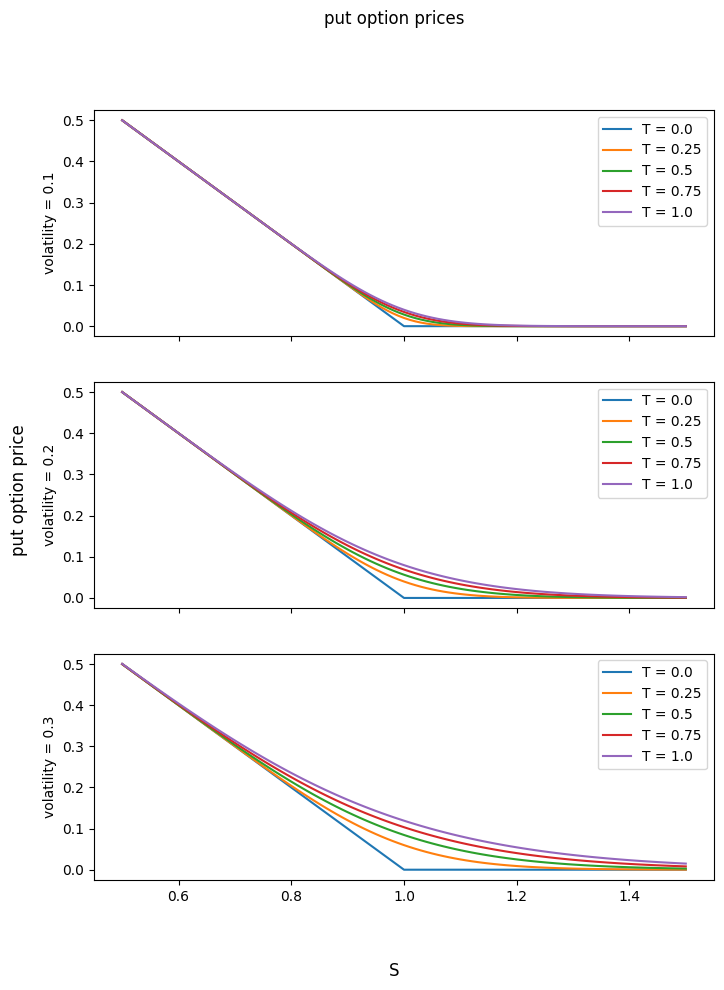

In [ ]:
fig, ax = plt.subplots(3, sharex=True, figsize=(8, 10))
fig.suptitle('put option prices')
for i in range(3):
  params = BSParams(volatility=sigma[i])
  put_price = price(puts, ms, params)
  for t in range(5):
    ax[i].plot(S,put_price[t,:], label = 'T = '+ str(times[t]))
  ax[i].legend()
  #ax[i].set_title('volatility = '+ str(sigma[i]))
  ax[i].set_ylabel('volatility = '+ str(sigma[i]))

fig.supylabel('put option price')
fig.supxlabel('S')



**2**. 💅 <span style="color:blue">(5 points)</span>  What kind of dependence on the parameters of put option price do you observe? How does the price of a put option change with changes in volatility, time to expiration? Why? Provide the intuition.

💌*I want to apologise in advance for any mistakes. Haven't practised English for a while!*

$V = V(T,\sigma, S)$

* $S \uparrow \Rightarrow V \downarrow$.  This can be seen from the following expressions:
$$ V^{put} = e^{-rT} K\Phi(-d_2) -S\Phi(-d_1),$$

$$
d_1 = \frac{1}{\sigma\sqrt{T }} \biggl(\ln\frac{S}{K}
  + \biggl(r+\frac{\sigma^2}{2}\biggr) T\biggr), \qquad
d_2 = \frac{1}{\sigma\sqrt{T}} \biggl(\ln\frac{S}{K}
  + \biggl(r-\frac{\sigma^2}{2}\biggr) T\biggr).
$$
* $T \uparrow \Rightarrow V \uparrow$ and we can see that $(V(T_i))_i$ converge to each other as the $|K-S|$ increases.

in case $T = 0: $ $V$ -- piecewise linear function, since $S = S_0 = S_T$ and $$V^{put} = (K - S_T)_{+} = (K - S)_{+} $$

* $\sigma \uparrow \Rightarrow V \uparrow$

* time to expiration: $(T-t)\uparrow \Rightarrow V(t) \uparrow $ (as in the case of $T$. We have just changed $T$ to $T-t$ in Black-Scholes formula)
$$ V^{put}(t) = e^{-r(T-t)} K\Phi(-d_2) -S\Phi(-d_1),$$

$$
d_1 = \frac{1}{\sigma\sqrt{(T - t) }} \biggl(\ln\frac{S}{K}
  + \biggl(r+\frac{\sigma^2}{2}\biggr) (T - t)\biggr), \qquad
d_2 = \frac{1}{\sigma\sqrt{(T - t)}} \biggl(\ln\frac{S}{K}
  + \biggl(r-\frac{\sigma^2}{2}\biggr) (T - t)\biggr).
$$


**3**. 💅 <span style="color:blue">(15 points)</span> Replicate considered put option using the portfolio rebalanced $n$ times (i.e. every $dt = T/n$ units of time). Using simulations, estimate the distribution of the replication error.


    1) Generate m random trajectories of price process trajectories on the segment [0,t] with a step dt = T/n.

    2) For each trajectory at each moment of time, find a replicating portfolio. Assume that the initial value of the portfolio is equal to the option price.

    3) For each trajectory, calculate the difference between the value of the replicating portfolio at time T and the payout to be made on the option.

    4) Display the distribution of the obtained differences in the form of a histogram.


*Note: use $m = 2^{10} - 1$ and $n$ = 123*.

In [ ]:
def make_bsm_market_simulator(
    ms: MarketState,
    params: BSParams,
    time_stop: float,
    n_steps: int,
):

    def simulate(n_paths: int, seed: int = 0xB0BA_C_3AB0DA):
        dt = (time_stop - ms.time) / n_steps
        random = np.random.default_rng(seed)
        norm = random.normal(size=(n_paths, n_steps))
        d_log_s = (
            (ms.interest_rate - params.volatility ** 2 / 2) * dt
            + params.volatility * norm * np.sqrt(dt)
        )
        d_log_s = np.insert(d_log_s, 0, np.zeros(n_paths), axis=1)
        return ms.stock_price * np.exp(np.cumsum(d_log_s, axis=-1))

    return simulate

In [ ]:
def delta(option: StockOption, ms: MarketState, params: BSParams):
    nd1 = stats.norm.cdf(d1(option, ms, params))
    return np.where(option.is_call, nd1, nd1 - 1)

In [ ]:
def calc_hedging_pnl(
    option: StockOption,
    ms: MarketState,
    params: BSParams,
    n_steps: int,
    n_paths: int,
    seed: int = 0xB0BA_C_3AB0DA,
):
    sim_fn = make_bsm_market_simulator(ms, params, option.expiration_time, n_steps)
    paths = sim_fn(n_paths, seed)                                            # paths.shape == (n_paths, n_steps + 1)
    times = np.linspace(ms.time, option.expiration_time, n_steps + 1)[None]  # times.shape == (1,       n_steps + 1)
    bank_acc = 1.0 * np.exp(ms.interest_rate * (times - times[:, 0]))
    df = 1.0 / bank_acc

    inter_ms = MarketState(
        stock_price=paths,
        interest_rate=ms.interest_rate,
        time=times,
    )

    opt_p = price(option, inter_ms, params)
    stock_pos = delta(option, inter_ms, params)
    bank_acc_pos = df * (opt_p - stock_pos * paths)
    hedging_pnl = (
        stock_pos[:, :-1] * np.diff(paths, axis=-1)
        + bank_acc_pos[:, :-1] * np.diff(bank_acc, axis=-1)
    )
    payoff = -option.payoff(paths[:, [-1]])
    return np.append(hedging_pnl, payoff, axis=-1)

In [ ]:
m = 2**10 -1
n = 123

T = 1.0
r = 0.1
S = 100
K = 100
vol = 0.167
seedseed = 42

In [ ]:
option = PutStockOption(strike_price=K, expiration_time=T)
ms = MarketState(stock_price=S, interest_rate=r)
params = BSParams(volatility=vol)

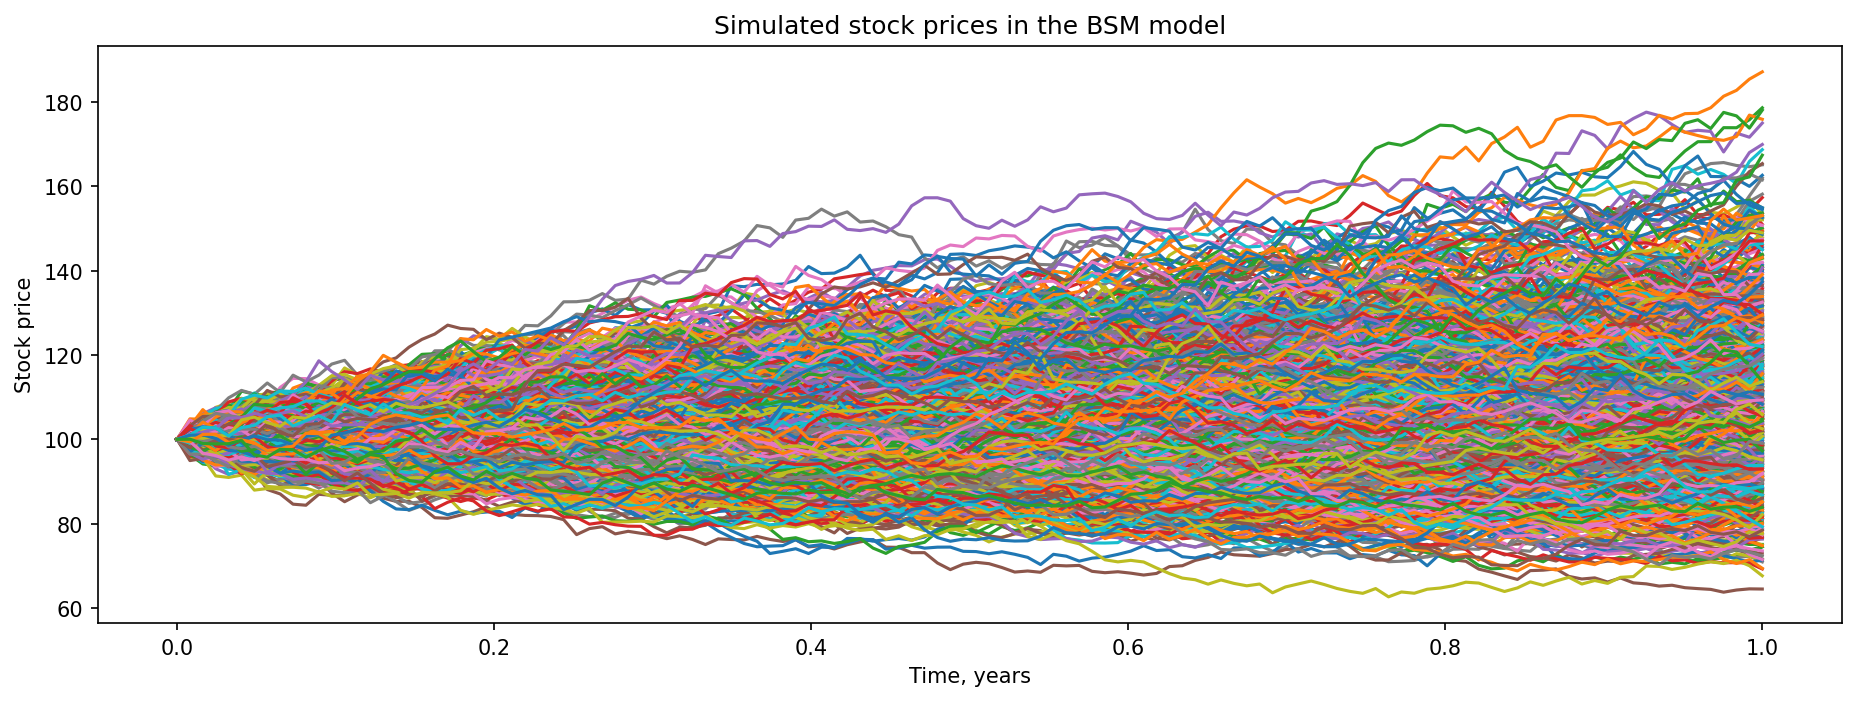

In [ ]:
sim_fn = make_bsm_market_simulator(ms, params, option.expiration_time, n)
paths = sim_fn(m, seedseed)

t = np.linspace(0, T, n + 1)
_, ax = plt.subplots(figsize=(15, 5), dpi=150)
ax.plot(t, paths.T)
ax.set_xlabel("Time, years")
ax.set_ylabel("Stock price")
ax.set_title("Simulated stock prices in the BSM model")
plt.show()

In [ ]:

H = calc_hedging_pnl(
    option,
    ms,
    params,
    n_paths=m,
    n_steps=n,
    seed=seedseed,
)

In [ ]:
#the value of the replicating portfolio at time T
#V_p_T = V_p_0 + \sum(G_t dB_t + H_t dS_t)
V_p = H[:, :-1].sum(-1)
#the payout to be made on the option
V = H[:, -1]

In [ ]:
res = V_p + V

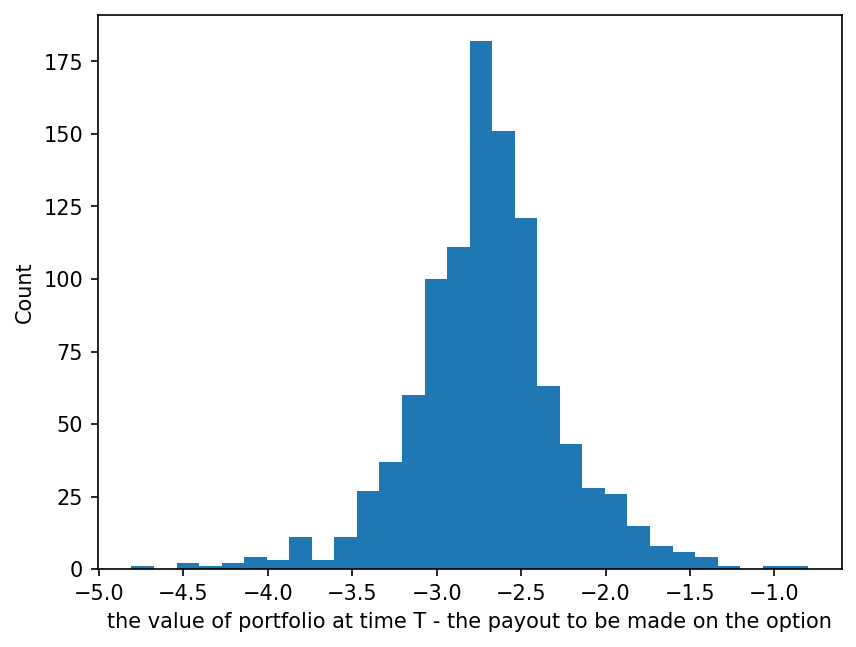

In [ ]:
_, ax = plt.subplots(dpi=150)
ax.hist(res, bins=30)
ax.set_xlabel("the value of portfolio at time T - the payout to be made on the option")
ax.set_ylabel("Count")

plt.show()

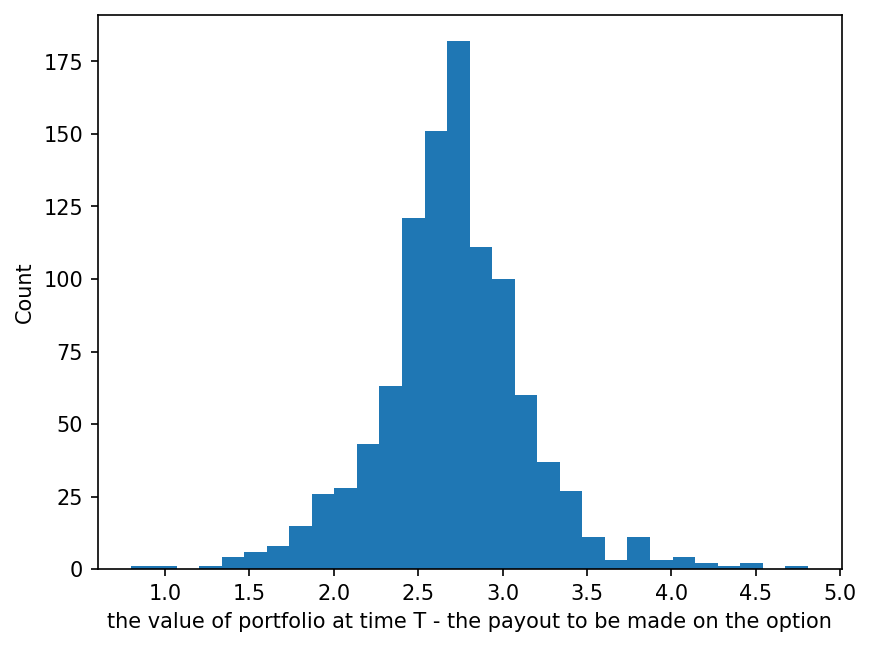

In [ ]:
#то же самое, но короче...
_, ax = plt.subplots(dpi=150)
ax.hist(-H.sum(-1), bins=30)
ax.set_xlabel("the value of portfolio at time T - the payout to be made on the option")
ax.set_ylabel("Count")

plt.show()

---

### Problem 2 (50 points)

Consider a simplified Stein-Stein stochastic volatility model, given by processes $(B_t, S_t, V_t)$ on $(\Omega, \mathcal F, (\mathcal F)_{t \geq 0}, \mathbb{P})$, with $\mathbb{P}$ being a **real-world** probability measure,

$$dB_t = rB_t dt, \quad B_0 = b,$$
$$dS_t = \mu S_t dt + V_t S_t dW^{1}_t, \quad S_0 = s,$$
$$dV_t = \kappa(\theta - V_t)dt + \sigma dW^{2}_t, \quad V_0 = v,$$
where $W^{1}_t$ and $W^{2}_t$ are independent Brownian motions on $\mathbb{P}$.


The process $S_t$ describes the evolution of the price of a stock continuously paying dividends with rate $q$. The process $B_t$ is a money market account with risk-free interest rate $r$.



**1**. 🧠 <span style="color:blue">(20 points)</span> Does there exist an equivalent to $\mathbb{P}$ (local) martingale measure $\mathbb{Q}$? If yes, find the Radom-Nikodym derivative $d\mathbb{P}/d\mathbb{Q}$. Is the market consisting of $(B_t, S_t)$ free of arbitrage?

*Hint: use Girsanov's theorem.*


-------------

Consider $\nu_t$, $\rho_t$ such that $\int_0^T |\nu_t|dt \leq \infty $, $\int_0^T |\rho_t|dt \leq \infty $

Let us define new Brownian motions with a shift. By Girsanov's theorem they are ordinary Brownian motions under measure Q.

$$dW_t^{1,\mathbb{Q}} = \nu_t dt + dW_t^{1,\mathbb{P}}$$
$$ dW_t^{2,\mathbb{Q}} = \rho_t dt + dW_t^{2,\mathbb{P}}$$



If Q - ELMM $⇒$ $dS_t = (r_t - q_t)S_tdt + \sigma_t^1 dW_t^{1,\mathbb{Q}} + \sigma_t^2 dW_t^{2,\mathbb{Q}}$

on the other hand  $dS_t = \mu S_t dt + V_t S_t dW_t^{1,\mathbb{P}} = (\mu - \nu_t V_t)S_tdt + V_t S_t dW_t^{1,\mathbb{Q}} $

$$⇒\nu_t =  \frac{\mu - r + q}{V_t}, \quad \sigma_t^1 = V_t S_t, \quad \sigma_t^2 = 0 $$

similarly $dV_t = \kappa(\theta - V_t) dt + \sigma dW_t^{2,\mathbb{P}} = (\kappa(\theta - V_t) - \sigma \rho) dt + \sigma dW_t^{2,\mathbb{Q}} $

$\rho$ - any function such that $\int_0^T |\rho_t|dt \leq \infty $. For example $\rho_t =0$

---
Let's find expression for $V_t$

$$x_t:= e^{\kappa t} V_t, \quad x_0 = V_0 = v$$

$$dx_t = \kappa e^{\kappa t} V_t dt + e^{\kappa t}((\kappa \theta - \kappa V_t)dt +\sigma dW_t^{2,\mathbb{P}}) = e^{\kappa t}(\kappa \theta dt + \sigma dW_t^{2,\mathbb{P}}) $$
$$x_t = v +  \kappa \theta \int_0^t e^{\kappa s}ds + \sigma \int_0^t e^{\kappa s} dW_s^{2,\mathbb{P}} $$
$$V_t = \frac{v}{e^{\kappa t}}+ \frac{\kappa \theta}{e^{\kappa t}} \frac{e^{\kappa t} - 1}{\kappa} + \sigma\int_0^t e^{\kappa (s-t)} dW_s^{2,\mathbb{P}} =\\ v  e^{-\kappa t} + \theta (1 - e^{-\kappa t}) + \sigma\int_0^t e^{\kappa (s-t)} dW_s^{2,\mathbb{P}} =\\ \theta + e^{-\kappa t}(v-\theta) + \sigma\int_0^t e^{\kappa (s-t)} dW_s^{2,\mathbb{P}} $$

----
Novikov's condition is satisfied:

$$\mathbb{E} \exp\left\{ \frac{1}{2} \int_{0}^{t} (\nu_s^2 +\rho_s^2) ds\right\} = \mathbb{E} \exp\left\{ \frac{1}{2} \int_{0}^{t} (\frac{\mu - r + q}{V_s})^2  ds\right\}  < \infty$$

Thus, we can apply Girsanov`s theorem.

$$\frac{\mathbb{Q}}{\mathbb{P}} = L_t := \exp \left\{ \int_{0}^{t} \varphi_s dW_s - \frac{1}{2} \int_{0}^{t} \| \varphi_s\|^2 ds\right\} = \exp \left\{ \int_{0}^{t} \nu_s dW_s^1 - \frac{1}{2} \int_{0}^{t} \nu_s^2 ds\right\}=\\ \exp \left\{ (\mu - r+q)\int_{0}^{t} V_t^{-1} dW_s^1 - \frac{(\mu - r+q)^2}{2} \int_{0}^{t} V_t^{-2} ds\right\}
$$





Q--ELMM by construction(and we can check that $\widetilde{S_t} = e^{\int_0^t(q_s -r_s)ds}S_t$ -- local martingale)

by First Fundamental Theorem of Asset Pricing: $NFLVR ⇔ ∃ ELMM $. Since we have found ELMM Q, NFLVR holds (i.e. market is free of arbitrage).

------------------

**2**. 🧟 <span style="color:blue">(30 points)</span> Assume that the market consists of $(B_t, S_t)$, meaning that we can buy/sell any amount of corresponding risk-free and risky assets. Consider an arbitrary bounded contingent claim paying $g(S_T)$ at moment $T$. Can we replicate such claim on a given market? If no, which conditions on model parameters, such as volatility of volatility $\sigma$, speed of mean reversion $\kappa$, etc., should we impose to guarantee the replication? What can we say about the completeness of the Stein-Stein model?

*Hint: use Ito's formula for the price of contingent claim.*

--------------------


The price of contingent claim can be represented as function $U_t = U(t, S_t,V_t)$. By Ito`s formula:
$$dU_t = U'_tdt + U'_SdS_t +U'_VdV_t + \frac{1}{2} U''_{SS}dS_t^2 +  \frac{1}{2} U''_{VV}dV_t^2 + U''_{SV}(dS_t)(dV_t)=\\ U'_tdt + U'_S( \mu S_t dt + V_t S_t dW^{1}_t) +U'_V(\kappa(\theta - V_t)dt + \sigma dW^{2}_t) + \frac{1}{2} U''_{SS}(V_t^2S_t^2 dt) +  \frac{1}{2} U''_{VV}(\sigma^2 dt) + 0=\\(U'_t+ U'_S \mu S_t + U'_V\kappa(\theta - V_t)  + \frac{1}{2} U''_{SS}V_t^2S_t^2 + \frac{1}{2} U''_{VV}\sigma^2)dt + U'_S V_t S_t  dW^{1}_t+ U'_V \sigma  dW^{2}_t=\\ \alpha_t dt + \beta_t dW_t^{1} + \gamma_t dW_t^2 $$

On the other hand for self-financing strategy $\pi$:
 $$dU_t^{\pi} = G_tdB_t + H_tdS_t = \alpha'dt + \beta'dW_t^1 $$

If $\gamma_t \neq 0$, we can't find $G_t$ and $H_t$ to $dU_t =dU_t^{\pi}$, so we can't replicate this contingent claim.

To garantee replication, we can allow to buy/sell assets, whose prices depend on $V_t$:
$$dU_t^{\pi} = G_tdB_t + H_tdS_t + F_tdNewAsset_t = \alpha'dt + \beta'dW_t^1 +\gamma_t'dW_t^2 $$

or we can impose conditions on model parameters to make $\gamma_t = 0$:
$$\gamma_t = U'_V\sigma \Rightarrow U'_V = 0 \quad or \quad \sigma = 0 $$





--------
Completeness means that any bounded contingent claim is replicable.

By Second Fundamental Theorem of Asset Pricing: completeness $⇔ ∃! EMM$.

In the previous problem we found many EMMs that are generated by changing the parameter $\rho$, so Stein-Stein model is not complete.

---

### Problem 3 (20 points)

🧟 <span style="color:blue">(20 points)</span> Show that if $X_t$ is a local martingale, bounded from below, then it is a supermartingale.


Given
*   $X_t \ge C = const$
*   $X_t$ -- local maringale($X\in \mathcal{F}$, $\exists$ stopping times $(\tau_n )_{n =1}^{+\infty}\in \mathcal{F}$ such that $\tau_n <\tau_{n+1}$ a.s., $\tau_n \longrightarrow +\infty$ a.s., $\forall n$ $X_t^{\tau_n} = X_{t\wedge \tau_n}$ is a martingale)


We want to proof that:
1. $X$ is adapted to $\mathcal{F}$;
2. $ \mathbb{E}|X_t| < \infty$ for any $t\in[0,T]$;
3. $ \mathbb{E}(X_t | \mathcal{F}_s) \leq X_s$ for any $0\le s\le t \le T$.

--------
$X$ is a local mrtingale $⇒$ is adapted to $\mathcal{F}$.


Let's prove the second point.

$$ \mathbb{E}(X_t) = \mathbb{E}(\underline{\lim}_{n→∞}X_t^{\tau_n}) \leq \underline{\lim}_{n→∞}\mathbb{E}(X_t^{\tau_n}) = \mathbb{E}X_0 \leq \infty$$

The third point:

$$\mathbb{E}(X_t|\mathcal{F}_s)  = \mathbb{E}(\underline{\lim}X_t^{\tau_n}|\mathcal{F}_s) \leq \underline{\lim}\mathbb{E}(X_t^{\tau_n}|\mathcal{F}_s) = \underline{\lim}X_s^{\tau_n} = X_s $$






---